1) Extract values of the following 8 features from the data file AmesHousing.txt: Overall Qual,
Gr Liv Area, Total Bsmt SF, Bedroom AbvGr, Garage Area, Lot Area, TotRms AbvGrd,
SalePrice, and visualize data using scatter plots with Sale Price being the y-axis and another
feature being the x-axis.

In [2]:
#First we need to import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

columns = ['Overall Qual','Gr Liv Area','Total Bsmt SF','Bedroom AbvGr','Garage Area','Lot Area','TotRms AbvGrd','SalePrice']

#Load the text file
data = pd.read_csv('AmesHousing.txt',sep='\t',usecols=columns)

In [3]:
data

,Lot Area,Overall Qual,Total Bsmt SF,Gr Liv Area,Bedroom AbvGr,TotRms AbvGrd,Garage Area,SalePrice
0,31770,6,1080.0,1656,3,7,528.0,215000
1,11622,5,882.0,896,2,5,730.0,105000
2,14267,6,1329.0,1329,3,6,312.0,172000
3,11160,7,2110.0,2110,3,8,522.0,244000
4,13830,5,928.0,1629,3,6,482.0,189900
...,...,...,...,...,...,...,...,...
2925,7937,6,1003.0,1003,3,6,588.0,142500
2926,8885,5,864.0,902,2,5,484.0,131000
2927,10441,5,912.0,970,3,6,0.0,132000
2928,10010,5,1389.0,1389,2,6,418.0,170000


In [4]:
#Check for null values
data.isnull().sum()

Lot Area         0
Overall Qual     0
Total Bsmt SF    1
Gr Liv Area      0
Bedroom AbvGr    0
TotRms AbvGrd    0
Garage Area      1
SalePrice        0
dtype: int64

In [5]:
data = data.dropna(axis=0)

In [6]:
data.isnull().sum()

Lot Area         0
Overall Qual     0
Total Bsmt SF    0
Gr Liv Area      0
Bedroom AbvGr    0
TotRms AbvGrd    0
Garage Area      0
SalePrice        0
dtype: int64

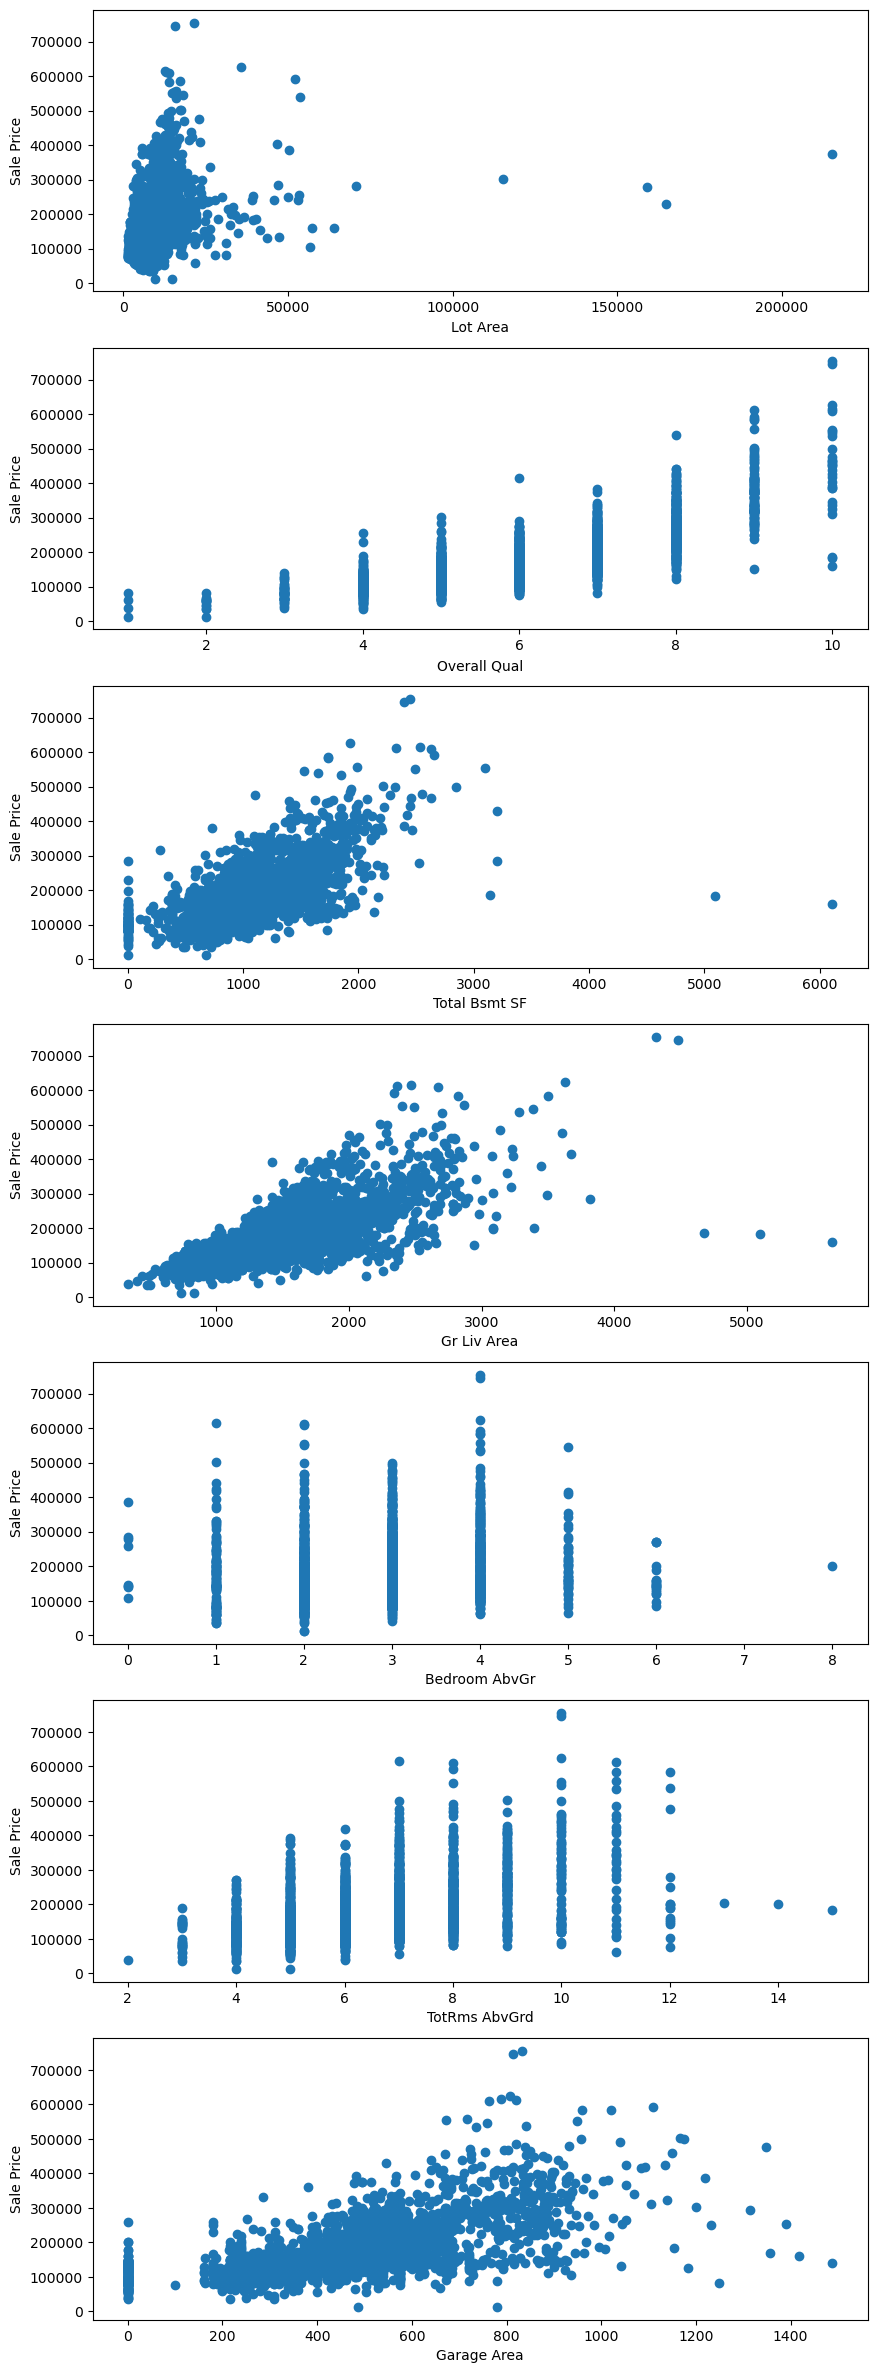

In [33]:
fig,axs = plt.subplots(7,1,figsize=(10,30))
axs.shape
for i in range(7):
    axs[i].scatter(data.iloc[:,i],data.iloc[:,7])
    axs[i].set(ylabel='Sale Price',xlabel=data.columns[i])

2) Use scikit-learn to fit a simple regression model with SalePrice being the target variable and Lot Area being the feature. Show the scatter plot of the data and the regression line in the ame figure.

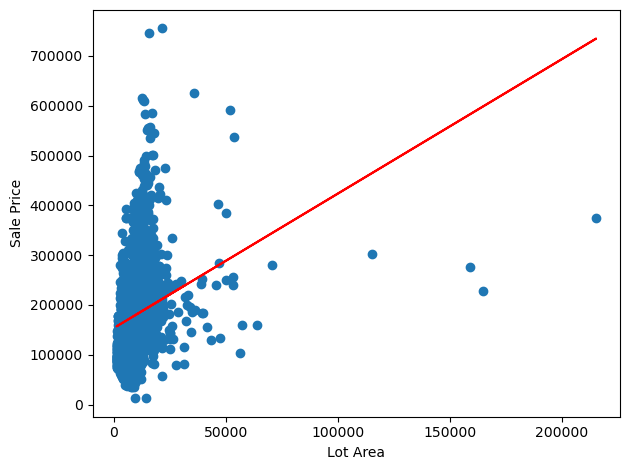

In [51]:
#Instantiate Simple Linear Regression object
slr = LinearRegression()
X = data[['Lot Area']].values
Y = data['SalePrice'].values
slr.fit(X,Y)
y_pred = slr.predict(X)

#plot the data and the regression line
plt.scatter(X,Y)
plt.plot(X,y_pred,color='red')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.tight_layout()
plt.show()

3) Use scikit-learn to fit a multiple regression model with Sale Price being the target variable and the remaining 7 variables being the features. Show the values of the regression coefficients and the R<sup>2</sup> value. 

In [92]:
#from sklearn.model_selection import train_test_split
target = 'SalePrice'
features = data.columns[data.columns != target]

X = data[features].values
y = data[target].values



In [96]:
#fit multiple regression model
slr = LinearRegression()
slr.fit(X,y)
y_train_pred = slr.predict(X)

In [97]:
#Print the regression coefficients
print(f'Number of coefficients {len(slr.coef_)}')
for index,coef in enumerate(slr.coef_):
    print(f'Coefficient {index} = {coef}')
    

Number of coefficients 7
Coefficient 0 = 0.6774188383427495
Coefficient 1 = 24440.63260732436
Coefficient 2 = 28.960883980901063
Coefficient 3 = 53.040489166169515
Coefficient 4 = -9472.724561905565
Coefficient 5 = 1001.9337362119425
Coefficient 6 = 53.27949140999423


In [99]:
#Print Rsquared value
from sklearn.metrics import r2_score
r2_train = r2_score(y,y_train_pred)
print(f'R^2 train: {r2_train}')


R^2 train: 0.7884462460303164


4. From the scatter plots in Problem 1, you can see some outliers. Remove those outliers with Lot Area > 100,000, Total Bsmt SF > 3000, Gr Liv Area > 4000, TotRms AbvGrd > 12, or Garage Area > 1200 from the data and repeat problems 2 and 3. Plot the regression lines in Problem 2 and this Problem in the same figure. Comparing the R<sup>2</sup> value in this problem with that of Problem 3, what do you observe?

In [159]:
filtered = data[(data['Lot Area']<= 100000) & (data['Total Bsmt SF'] <=3000) & (data['Gr Liv Area'] <= 4000) & (data['TotRms AbvGrd'] <=12) & (data['Garage Area']<=1200)]

In [160]:
filtered

,Lot Area,Overall Qual,Total Bsmt SF,Gr Liv Area,Bedroom AbvGr,TotRms AbvGrd,Garage Area,SalePrice
0,31770,6,1080.0,1656,3,7,528.0,215000
1,11622,5,882.0,896,2,5,730.0,105000
2,14267,6,1329.0,1329,3,6,312.0,172000
3,11160,7,2110.0,2110,3,8,522.0,244000
4,13830,5,928.0,1629,3,6,482.0,189900
...,...,...,...,...,...,...,...,...
2925,7937,6,1003.0,1003,3,6,588.0,142500
2926,8885,5,864.0,902,2,5,484.0,131000
2927,10441,5,912.0,970,3,6,0.0,132000
2928,10010,5,1389.0,1389,2,6,418.0,170000


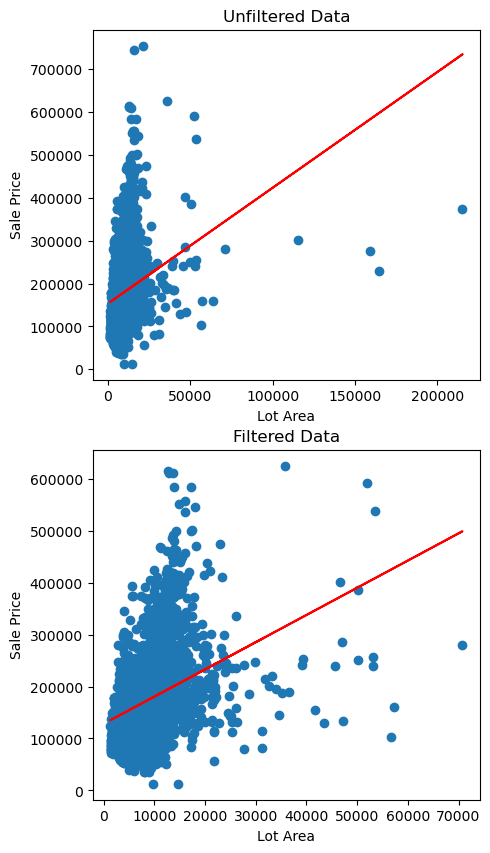

In [176]:
#Repeat of Problem 2

#Instantiate Simple Linear Regression object from Problem 2
slr0 = LinearRegression()
X0 = data[['Lot Area']].values
Y0 = data['SalePrice'].values
slr0.fit(X0,Y0)
y_pred0 = slr0.predict(X0)

#Instantiate Simple Linear Regression object for filtered data
slr1 = LinearRegression()
X1 = filtered[['Lot Area']].values
Y1 = filtered['SalePrice'].values
slr1.fit(X1,Y1)
y_pred1 = slr1.predict(X1)


fig,(ax0,ax1) = plt.subplots(2,1,figsize=(5,10))
#Configure unfiltered scatter plot
ax0.scatter(X0,Y0)
ax0.set_xlabel('Lot Area')
ax0.set_ylabel('Sale Price')
ax0.set_title('Unfiltered Data')
ax0.plot(X0,y_pred0,color='red')
#Configure filtered scatter plot
ax1.scatter(X1,Y1)
ax1.set_xlabel('Lot Area')
ax1.set_ylabel('Sale Price')
ax1.set_title('Filtered Data')
ax1.plot(X1,y_pred1,color='red')



In [177]:
#Repeat of Problem 3

target = 'SalePrice'
features = data.columns[data.columns != target]

X = data[features].values
y = data[target].values

#fit multiple regression model
slr = LinearRegression()
slr.fit(X,y)
y_train_pred = slr.predict(X)


#Print the regression coefficients
print(f'Number of coefficients {len(slr.coef_)}')
for index,coef in enumerate(slr.coef_):
    print(f'Coefficient {index} = {coef}')
    
#Print Rsquared value
from sklearn.metrics import r2_score
r2_train = r2_score(y,y_train_pred)
print(f'R^2 train: {r2_train}')


Number of coefficients 7
Coefficient 0 = 0.6774188383427495
Coefficient 1 = 24440.63260732436
Coefficient 2 = 28.960883980901063
Coefficient 3 = 53.040489166169515
Coefficient 4 = -9472.724561905565
Coefficient 5 = 1001.9337362119425
Coefficient 6 = 53.27949140999423
R^2 train: 0.7884462460303164


In [178]:
#Repeat of Problem 3

target = 'SalePrice'
features = filtered.columns[filtered.columns != target]

X = filtered[features].values
y = filtered[target].values

#fit multiple regression model
slr = LinearRegression()
slr.fit(X,y)
y_train_pred = slr.predict(X)


#Print the regression coefficients
print(f'Number of coefficients {len(slr.coef_)}')
for index,coef in enumerate(slr.coef_):
    print(f'Coefficient {index} = {coef}')
    
#Print Rsquared value
from sklearn.metrics import r2_score
r2_train = r2_score(y,y_train_pred)
print(f'R^2 train: {r2_train}')

Number of coefficients 7
Coefficient 0 = 1.461171734898831
Coefficient 1 = 22270.842276858275
Coefficient 2 = 37.8774981761168
Coefficient 3 = 59.79995557983001
Coefficient 4 = -12922.326977616482
Coefficient 5 = 1126.9066686983556
Coefficient 6 = 48.36471982160596
R^2 train: 0.832130793634835


The R<sup>2</sup> value increased. This means that the model has a better fit. This is likely due to the removal of the outliers.